### Testing the Environment

In [1]:
# Testing the environment

import cv2
import numpy as np
import tensorflow as tf

print("OpenCV version", cv2.__version__)

print("Numpy version", np.__version__)

print("Tensorflow version", tf.__version__)


OpenCV version 3.1.0
Numpy version 1.13.1
Tensorflow version 1.3.0


Distorted Image


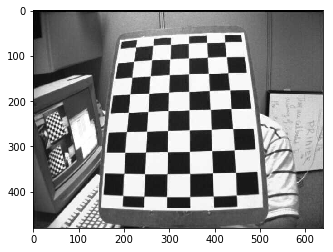

Corrected Image


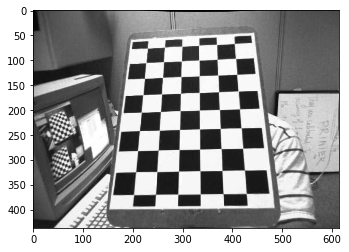

In [2]:
import numpy as np
import cv2
import os
import glob
import datetime as datetime
from matplotlib import pyplot as plt

% matplotlib inline

PATTERN_PATH = os.path.join("/","opencv","samples","data")

criteria = (cv2.TERM_CRITERIA_EPS  + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# preparing object points with Z = 0
objp = np.zeros((6*7,3), np.float32)

#print(objp.shape)

objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

#print(objp)
#print(objp.shape)

obj_points = []
image_points = []

for image in glob.glob(os.path.join(PATTERN_PATH,"left*.jpg")):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

    if ret == True:
        obj_points.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        #corners2 = np.reshape(corners2, (42,2))
        #print(np.array(corners2).shape)
        image_points.append(corners2)

        # Drawing and displaying the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2, ret)
        #cv2.imwrite('image.jpg',img)

# At this stage we have both the object points and the image points
# next, we will need to calibrate the camera using the image and the object points

img = cv2.imread(os.path.join(PATTERN_PATH,"left12.jpg"))
h, w = img.shape[:2]

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, image_points, (h,w), None, None)

# generating a new camera matrix based a free scaling parameter, alpha
# we will use the function getOptiomalNewCameraMatrix()

new_camera_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h),  1, (w,h))

# undistorting the image
dst = cv2.undistort(img, mtx, dist, None, new_camera_mtx)

# crop the image
x, y, w, h = roi

#corrected-image
dst = dst[y:y+h, x:x+w]

#cv2.imwrite("corrected.jpg",dst)
#cv2.imwrite("normal.jpg",img) 

print("Distorted Image")
plt.imshow(img)
plt.show()

print("Corrected Image")
plt.imshow(dst)
plt.show()



In [3]:
def draw(img, corners, imgpts):
    """
    Takes the corners of the chessboard, obtained using cv2.findChessboardCorners() and axis points to draw 3D axis
    Input:
        :img - Image
        :corners - Corners of the image
        :imgpts  - Image Points to plot in 3d 
        return img  - 2D-3D perspective image
    """
    
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5) # Z-axis
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5) # Y-axis
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5) # X-axis
    
    return img
    

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

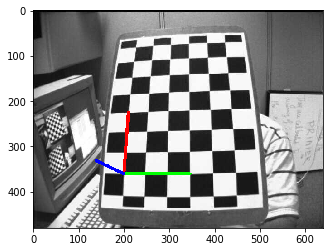

In [5]:
img = cv2.imread(os.path.join(PATTERN_PATH,"left12.jpg"))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

if ret == True:
    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    ret, rvecs, tvecs = cv2.solvePnP(objp, corners2, mtx, dist)

    # project 3D points to image plane
    imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

    img = draw(img,corners2,imgpts)
    
    plt.imshow(img)
    plt.show()

In [6]:
# Draw a Cube

def draw_cube(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    
    #drawing the ground in green
    img = cv2.drawContours(img, [imgpts[:4]], -1, (0,255,0), -3)
    
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]), (255), 3)
        
    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]], -1, (0,0,255), 3)
    
    return img


In [7]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

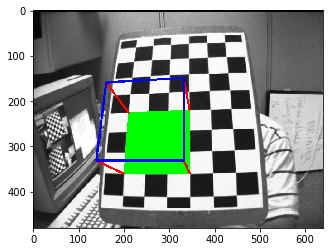

In [8]:
img = cv2.imread(os.path.join(PATTERN_PATH,"left12.jpg"))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

if ret == True:
    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    ret, rvecs, tvecs = cv2.solvePnP(objp, corners2, mtx, dist)

    # project 3D points to image plane
    imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

    img = draw_cube(img,corners2,imgpts)
    
    plt.imshow(img)
    plt.show()